In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [16]:
#Ex 1.1
ising_1D = -np.ones(16)
energies = [[],[]], [1-D,2-D]
magnet = []
for i in range(np.power(2,16)):
    arr = -1*np.array((((i & (1 << np.arange(16)))) > 0).astype(int))
    arr[arr==0]=1
    magnet.append(np.sum(arr)/16)
    energies[0].append(-np.sum(arr*np.roll(arr, 1)))
    arr2 = arr.reshape(4,4)
    energies[1].append(-np.sum(arr2*(np.roll(arr2, 1, 0)+np.roll(arr2, 1, 1))))
    
    


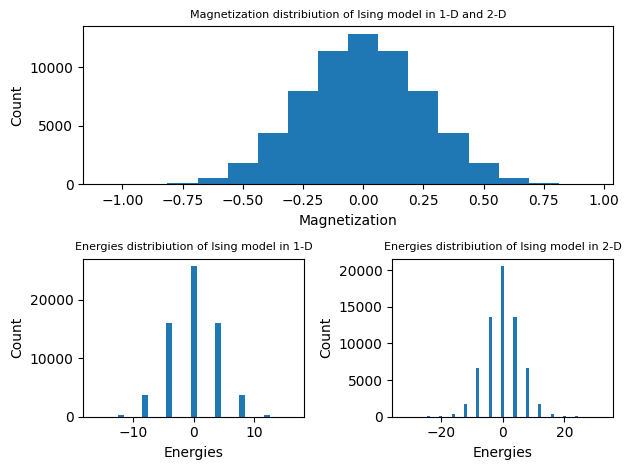

In [62]:
#Ex 1.2

fig = plt.figure(tight_layout=True)

ax = fig.add_subplot(2,1,1)
ax.hist(magnet, bins=np.arange(-1,1.1,1/8),align="left")
ax.set_ylabel('Count')
ax.set_xlabel('Magnetization')
ax.set_title('Magnetization distribiution of Ising model in 1-D and 2-D', fontsize=8)


hist = {}
for i in range(2):
    ax = fig.add_subplot(2,2,i+3)
    hist[i] = ax.hist(energies[i], bins=np.arange(-16-i*16,17.1+i*16,1),align="left")
    ax.set_ylabel('Count')
    ax.set_xlabel('Energies')
    ax.set_title('Energies distribiution of Ising model in %d-D' % (i+1), fontsize=8)
fig.align_labels()  
plt.show()



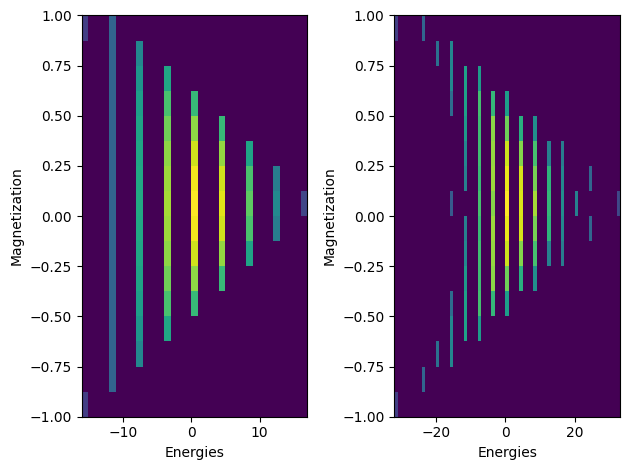

In [18]:
#Ex 1.3
import matplotlib.colors as mcolors

fig = plt.figure(tight_layout=True)
# fig = plt.figure(figsize=(7, 100))
for i in range(2):
    xedges = np.arange(-16-i*16,17.1+i*16,1)
    yedges = np.arange(-1,1.1,1/8)
    ax = fig.add_subplot(1,2,i+1)
    ax.hist2d(energies[i], magnet, (xedges,yedges), norm=mcolors.PowerNorm(0.2))
    ax.set_ylabel('Magnetization')
    ax.set_xlabel('Energies')

plt.show()



In [117]:
#Ex 1.4
#create tenperatures
T = np.arange(0.1,5,(5-0.1)/50)

#substruct ground state
norm_es = [[],[]]
for ind in [0,1]:
    for i,e in enumerate(energies[ind]):
        norm_es[ind].append(e-np.min(hist[ind][1])) 

#calculate partition function
z = [{},{}] ## [1-D,2-D]
for t in T:
    z[0][t] = np.sum(np.exp(-np.array(norm_es[0])/t))
    z[1][t] = np.sum(np.exp(-np.array(norm_es[1])/t))

#calculate probabilities
p=[{},{}] ##p[dimension][temperature][energy]
for ind in [0,1]:
    for t in T:
        p_t = []
        for i,e in enumerate(norm_es[ind]):
           p_t.append(np.exp(-e/t)/z[ind][t])
        p[ind][t] = p_t

#calculate energies
avg_e = [[],[]]
avg_e2 = [[],[]]
for i in range(2):
    for t in T:
        avg_e[i].append(np.sum(np.array(p[i][t])*np.array(norm_es[i])))
        avg_e2[i].append(np.sum(np.array(p[i][t])*np.array(norm_es[i])*np.array(norm_es[i])))
        

        


In [126]:
#calculate heat capacity
cv = [[],[]]
for i in range(2):
    for j,t in enumerate(T):
        cv[i].append(avg_e2[i][j]-(np.aravg_e[i][j]*avg_e[i][j])/(t*t))

In [127]:
cv[0]

[array([8.15684017e-13, 3.23351739e-04, 2.59628011e-01, 7.43346367e+00,
        5.36945950e+01, 1.80432584e+02, 3.65090884e+02, 5.32112157e+02,
        6.49036120e+02, 7.32515139e+02, 8.03013066e+02, 8.69287535e+02,
        9.32662553e+02, 9.92199562e+02, 1.04696234e+03, 1.09654668e+03,
        1.14100460e+03, 1.18065879e+03, 1.21595474e+03, 1.24736948e+03,
        1.27536321e+03, 1.30035713e+03, 1.32272592e+03, 1.34279768e+03,
        1.36085723e+03, 1.37715084e+03, 1.39189108e+03, 1.40526146e+03,
        1.41742058e+03, 1.42850578e+03, 1.43863620e+03, 1.44791550e+03,
        1.45643407e+03, 1.46427094e+03, 1.47149541e+03, 1.47816840e+03,
        1.48434360e+03, 1.49006844e+03, 1.49538496e+03, 1.50033048e+03,
        1.50493823e+03, 1.50923785e+03, 1.51325584e+03, 1.51701598e+03,
        1.52053958e+03, 1.52384587e+03, 1.52695215e+03, 1.52987406e+03,
        1.53262577e+03, 1.53522012e+03]),
 array([2.08061427e-13, 8.24792722e-05, 6.62248778e-02, 1.89609827e+00,
        1.36962032e+01

ValueError: x and y must be the same size

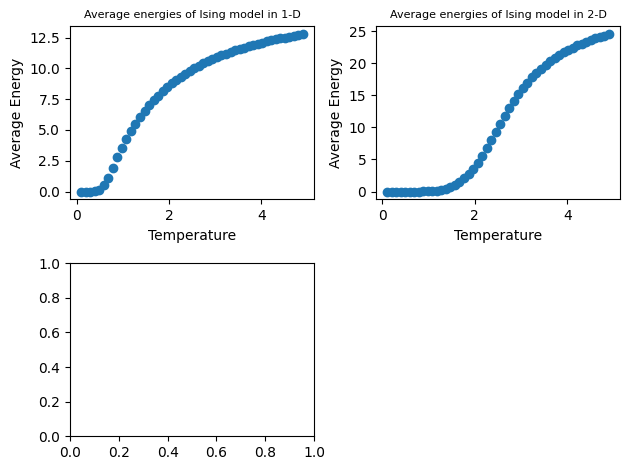

In [125]:
fig = plt.figure(tight_layout=True)

for i in range(2):
    ax = fig.add_subplot(2,2,i+1)
    ax.scatter(T, np.array(avg_e[i]))
    ax.set_ylabel('Average Energy')
    ax.set_xlabel('Temperature')
    ax.set_title('Average energies of Ising model in %d-D' % (i+1), fontsize=8)

for i in range(2):
    ax = fig.add_subplot(2,2,i+3)
    ax.scatter(T, np.array(cv[i]))
    ax.set_ylabel('Heat Capacity')
    ax.set_xlabel('Temperature')
    ax.set_title('Heat Capacity of Ising model in %d-D' % (i+1), fontsize=8)
fig.align_labels()  
plt.show()